In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
data = pd.DataFrame({
    'pH': [3, 5.5, 2.5, 7, 4, 6.5, 3.5, 6, 2, 7.5, 4.5, 5, 2.8, 8],
    'Concentração': ['Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída'],
    'Cheiro': ['Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro'],
    'Classe': ['Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica'],
})

In [33]:
data.head(14)

,pH,Concentração,Cheiro,Classe
0,3.0,Concentrada,Com cheiro,Ácida
1,5.5,Diluída,Sem cheiro,Básica
2,2.5,Concentrada,Com cheiro,Ácida
3,7.0,Diluída,Sem cheiro,Básica
4,4.0,Concentrada,Com cheiro,Ácida
5,6.5,Diluída,Sem cheiro,Básica
6,3.5,Concentrada,Com cheiro,Ácida
7,6.0,Diluída,Sem cheiro,Básica
8,2.0,Concentrada,Com cheiro,Ácida
9,7.5,Diluída,Sem cheiro,Básica


In [34]:
# Codificando variáveis categóricas
data = pd.get_dummies(data, columns=['Concentração', 'Cheiro'], drop_first=True)

# Separando as características e a variável alvo
X = data.drop('Classe', axis=1)
y = data['Classe']


# Exibir as colunas do DataFrame
print(data.columns)

Index(['pH', 'Classe', 'Concentração_Diluída', 'Cheiro_Sem cheiro'], dtype='object')


In [20]:
# Dividindo o conjunto de dados em treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Treinando um modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
# Fazendo previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

print(X_test)

     pH  Concentração_Diluída  Cheiro_Sem cheiro
9   7.5                  True               True
11  5.0                  True               True
0   3.0                 False              False
12  2.8                 False              False
5   6.5                  True               True


In [23]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Acurácia:", accuracy)
print("Relatório de Classificação:\n", classification_rep)

Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

      Básica       1.00      1.00      1.00         3
       Ácida       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



Text(0.5, 1.0, 'Matriz de Confusão')

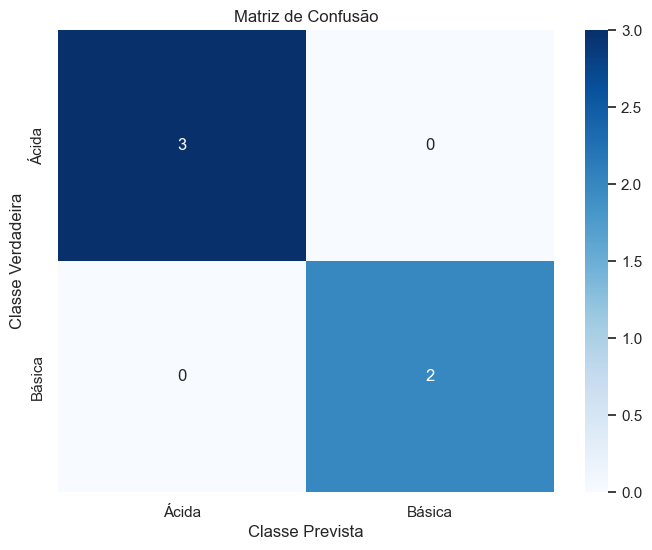

In [24]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ácida', 'Básica'], yticklabels=['Ácida', 'Básica'])
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.title('Matriz de Confusão')

C:\Users\s408397\AppData\Local\Temp\ipykernel_23896\981395246.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Classe Prevista', loc='upper right')


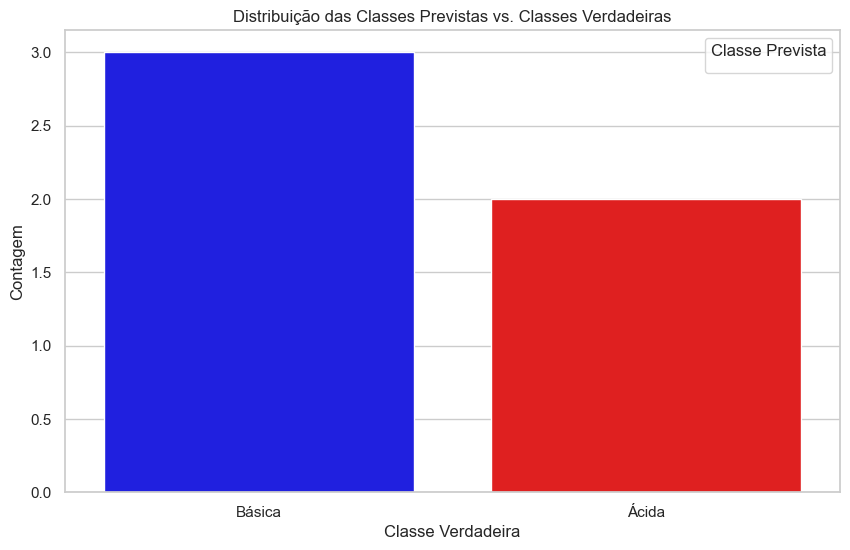

In [41]:
# Criando um gráfico de contagem
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, hue=y_pred, palette={"Ácida": "red", "Básica": "blue"})

# Personalizando o gráfico
plt.title('Distribuição das Classes Previstas vs. Classes Verdadeiras')
plt.xlabel('Classe Verdadeira')
plt.ylabel('Contagem')
plt.legend(title='Classe Prevista', loc='upper right')
plt.show()